# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

### **ATIVIDADE PRÁTICA 04 [Uso da API da OpenAI com técnicas de PLN]**


A **ATIVIDADE PRÁTICA 04** deve ser feita utilizando o **Google Colab** com uma conta sua vinculada ao Gmail. O link do seu notebook, armazenado no Google Drive, além do link de um repositório no GitHub e os principais resultados da atividade, devem ser enviados usando o seguinte formulário:

> https://forms.gle/GzwCq3R7ExtE9g9a8


**IMPORTANTE**: A submissão deve ser feita até o dia **26/11 (domingo)** APENAS POR UM INTEGRANTE DA EQUIPE, até às 23h59. Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO para o professor da disciplina de PLN.

### **EQUIPE**

---

**POR FAVOR, PREENCHER OS INTEGRANDES DA SUA EQUIPE:**


**Integrante 01:**

`[Artur Henrique Allen Santos, 11201721387]`

**Integrante 02:**

`[Pedro Régio Shoji, 11201721028]`


### **LIVRO**
---

`Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português.`

>

Disponível gratuitamente em:
  
  > https://brasileiraspln.com/livro-pln/1a-edicao/.


**POR FAVOR, PREENCHER OS CAPITULOS SELECIONADOS PARA A SUA EQUIPE:**

`Primeiro capítulo: 1`

`Segundo capítulo: 24`



### **DESCRIÇÃO**
---

Implementar um `notebook` no `Google Colab` que faça uso da **API da OpenAI** aplicando, no mínimo, 3 técnicas de PLN. As técnicas devem ser aplicadas nos 2 (DOIS) capítulos do livro **Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português**.

>

**RESTRIÇÃO**: É obrigatório usar o *endpoint* "*`Chat Completions`*".

>

As seguintes técnicas de PLN podem ser usadas:

*   Correção Gramatical
*   Classificação de Textos
*   Análise de Sentimentos
*   Detecção de Emoções
*   Extração de Palavras-chave
*   Tradução de Textos
*   Sumarização de Textos
*   **Similaridade de Textos**
*   **Reconhecimento de Entidades Nomeadas**
*   **Sistemas de Perguntas e Respostas**

>

Os capítulos devem ser os mesmos selecionados na **ATIVIDADE PRÁTICA 02**. Para consultar os capítulos, considere a seguinte planilha:

>

> https://docs.google.com/spreadsheets/d/1ZutzQ3v1OJgsgzCvCwxXlRIQ3ChXNlHNvB63JQvYsbo/edit?usp=sharing

>
>

**IMPORTANTE:** É obrigatório usar o e-mail da UFABC. Não é permitido alterar os capítulos já selecionados.



### **CRITÉRIOS DE AVALIAÇÃO**
---


Serão considerados como critérios de avaliação as técnicas usadas e a criatividade envolvida na aplicação das mesmas.




### **IMPORTANTE**

Para realizar as chamadas à API da OpenAI é necessário possuir uma chave válida. Tendo em mãos uma chave, é necessário defini-la como um segredo neste notebook. No menu vertical esquerdo, localize e clique no ícone **Secrets**, representado por uma chave, depois clique em **Add a new secret**. Em **Name** insira `api_key` e em **Value** a sua chave. Por último, Habilite o campo **Notebook access**.

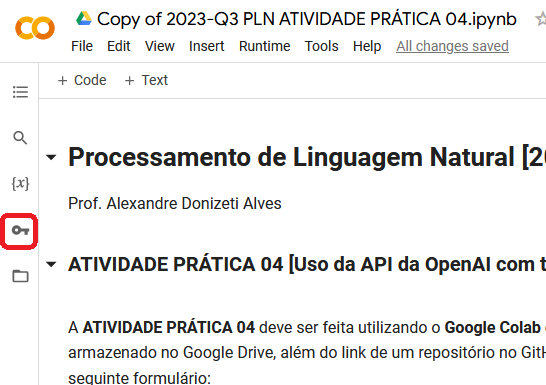

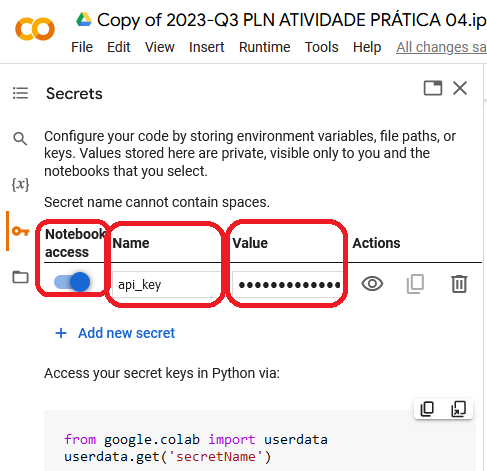

### **IMPLEMENTAÇÃO**
---

In [11]:
# por favor, inserir o código a partir daqui...
!pip install cohere tiktoken openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 114.2 MB/s eta 0:00:00


In [12]:
import openai
from google.colab import userdata

In [13]:
openai.__version__

'0.28.0'

In [14]:
api_key = userdata.get('api_key')

In [15]:
openai.api_key = api_key

In [16]:
import requests
from bs4 import BeautifulSoup

urls = ['https://brasileiraspln.com/livro-pln/1a-edicao/parte1/cap1/cap1.html', 'https://brasileiraspln.com/livro-pln/1a-edicao/parte10/cap24/cap24.html']

In [17]:
# Código para extração de texto do livro a partir de uma url reaproveitado da atividade 2
def text_from_url(url):
  response = requests.get(url)

  soup = BeautifulSoup(response.content, 'html.parser')

  content = soup.find('main', {'id': 'quarto-document-content'})

  paragraphs = content.find_all('p')

  text = ''

  for p in paragraphs:
    text += p.get_text()

  return text

In [18]:
# Retorna uma lista contendo seções do capítulo
def sections_from_url(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  content = soup.find('main', {'id': 'quarto-document-content'})

  headings = content.find_all('h2')

  sections = []

  for heading in headings:
      text = heading.get_text() + '\n'

      paragraphs = heading.find_all_next('p')

      for paragraph in paragraphs:
          text += paragraph.get_text() + '\n'

      sections.append(text)

  return sections


In [19]:
def get_response(mensagem_sistema, mensagem_usuario, max_tokens=200, temperature=0.7):
  resposta = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = [{"role": "system", "content": mensagem_sistema},
               {"role": "user", "content": mensagem_usuario}],
    max_tokens = max_tokens,
    temperature = temperature
  )

  resposta_text = resposta["choices"][0]["message"]["content"]

  return resposta_text

In [6]:
from time import sleep

In [7]:
!pip install nltk

In [20]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Separa a string passada em listas contendo uma quantidade fixa de tokens
def chunk_string(input_string, chunk_size):
    tokens = word_tokenize(input_string)

    chunks = [' '.join(tokens[i:i + chunk_size]) for i in range(0, len(tokens), chunk_size)]

    return chunks



In [28]:
def count_tokens(text):
  return len(word_tokenize(text))

### Aplicações de PLN

Extração de palavras chave:

In [26]:
cap_1_text = text_from_url(urls[0])
cap_24_text = text_from_url(urls[1])

In [44]:
def palavras_chave(text):
  sistema = 'Sua tarefa é listar até 10 palavras-chave do texto fornecido'

  # Evita que o texto exceda o limite de tokens
  usuario = chunk_string(text, 2000)[0]

  print(get_response(sistema, usuario))

In [45]:
palavras_chave(cap_1_text)

1. Processamento de Linguagem Natural
2. Língua
3. Linguagem humana
4. Inteligência Artificial
5. Linguística Computacional
6. Interpretação de Linguagem Natural
7. Geração de Linguagem Natural
8. Aplicações em PLN
9. Recursos em PLN
10. Ferramentas em PLN


In [46]:
palavras_chave(cap_24_text)

1. Sociedade
2. Ética
3. Inteligência Artificial (IA)
4. Vieses algorítmicos
5. Discriminação
6. Impactos sociais
7. Regulação
8. Direitos humanos
9. Justiça
10. Transparência


Sumarização

In [47]:
def sumarizacao(text):
  num_tokens = 300

  sistema = f'Sua tarefa é resumir o texto dado em até {num_tokens} palavras\n\n'
  usuario = chunk_string(text, 2000)[0]

  print(get_response(sistema, usuario, max_tokens=num_tokens))

In [48]:
sumarizacao(cap_1_text)

O Processamento de Linguagem Natural (PLN) é um campo de pesquisa que visa desenvolver métodos e sistemas para o processamento computacional da linguagem humana. Ele está relacionado à área de Inteligência Artificial (IA) e à Linguística Computacional. O PLN se divide em duas subáreas principais: a Interpretação de Linguagem Natural (NLU) e a Geração de Linguagem Natural (NLG).

Na NLU, o foco é analisar e interpretar a língua, segmentando e classificando seus componentes linguísticos e buscando compreender os significados construídos pelos seres humanos. Já na NLG, o objetivo é gerar linguagem natural, como respostas em chatbots, por exemplo.

No PLN, são utilizadas diversas ferramentas, recursos e aplicações. As ferramentas auxiliam na construção de aplicações, que podem ser sistemas computacionais ou aplicativos, e fazem uso de recursos, que fornecem informações linguísticas necessárias para o processamento da língua. Esses conceitos podem ser imprecisos e dependem do contexto de us

In [49]:
sumarizacao(cap_24_text)

A ética na inteligência artificial é um tema cada vez mais relevante na sociedade atual. Com o avanço da tecnologia, os sistemas de IA têm se tornado cada vez mais presentes e interativos, o que levanta questões éticas sobre seu comportamento e impacto na vida das pessoas.

Um dos principais problemas éticos relacionados à IA é o viés algorítmico. Quando os algoritmos são treinados com dados desbalanceados ou sem curadoria adequada, eles podem reproduzir comportamentos indesejáveis, incorretos ou injustos. Um exemplo disso é o caso de um software de reconhecimento facial que não conseguia identificar rostos de pessoas negras corretamente devido ao treinamento com dados majoritariamente de pessoas de pele clara.

Além disso, a IA também tem sido acusada de discriminação racial, impulsionar o ódio às minorias, influenciar resultados de eleições e explorar fraquezas psicológicas. Outra preocupação é a falta de transparência e explicabilidade dos algoritmos de IA, que são considerados verd

In [50]:
def entidades_nomeadas(text):
  sistema = 'Sua tarefa é extrair e explicar entidades nomeadas do texto dado'

  usuario = chunk_string(text, 2000)[0]

  print(get_response(sistema, usuario))

In [51]:
entidades_nomeadas(cap_1_text)

Entidades nomeadas presentes no texto:

1. Processamento de Linguagem Natural (PLN): campo de pesquisa que investiga e propõe métodos e sistemas de processamento computacional da linguagem humana.
2. Natural Language Understanding (NLU): subárea do PLN que se dedica à interpretação e análise da linguagem natural.
3. Natural Language Generation (NLG): subárea do PLN que se dedica à geração de linguagem natural.
4. Inteligência Artificial (IA): área da Ciência da Computação relacionada ao PLN.
5. Linguística Computacional: área que está intrinsecamente relacionada ao PLN.
6. Chatbot: sistema que interage com usuários por meio de conversas em linguagem natural.
7. ChatGPT2: exemplo de chatbot que é capaz de gerar língua de forma fluente.
8. Aplicações:


In [53]:
entidades_nomeadas(cap_24_text)

Entidades nomeadas presentes no texto:

1. Maria das Graças Volpe Nunes
2. Tayane Arantes Soares Mariza Ferro
3. IA (Inteligência Artificial)
4. MIT (Massachusetts Institute of Technology)
5. Joy Buolamwini
6. Timnit Gebru
7. Google Fotos
8. Flickr
9. Microsoft
10. IBM
11. Amazon
12. Twitter
13. OpenAI
14. Nina da Hora
15. União Europeia
16. OCDE (Organização para a Cooperação e Desenvolvimento Econômico)
17. UNESCO (Organização das Nações Unidas para a Educação, a Ciência e a Cultura)
18. Declaração Universal dos Direitos Humanos
19. Assembleia Geral das Nações Unidas
20. Constituição Brasileira
21. Carta dos Direitos Fundamentais da Uni
